## Final Project Submission

Please fill out:
* Student name: Laura Lewis
* Student pace: full time
* Scheduled project review date/time: 15 May 2019, 3:30pm BST
* Instructor name: Joe San Pietro
* Blog post URL:
***

# Table of contents

[1. Introduction and project aims](#Introduction-and-project-aims)

[2. The dataset](#The-dataset)

[3. Cleaning and pre-processing](#Cleaning-and-pre-processing)

[4. Exploratory data analysis](#Exploratory-data-analysis)

[5. Building a neural network](#Building-a-neural-network)

[6. Conclusions and recommendations](#Conclusions-and-recommendations)

***

# Introduction and project aims

- Short description of Airbnb
- Why Airbnb pricing is important
- Difficult thing to do correctly, to balance revenue and occupancy (explanation)
- Several pricing algorithms out there, including Airbnb's own. But all of them require you to add a a base price first (and sometimes also a minimum and maximum price).
- This project aims to build a neural network to predict the base price for properties in London.

***

# The dataset

- Insideairbnb.com - anti-Airbnb lobby group that scrapes data
- Includes data on all Airbnb listings in London that are live on x (date)
- Limitations - messy data. Most importantly, only includes advertised price, not actual average price paid or the price advertised on the calendar - each day can have a different price.
- Advertised price is set by the listing owner and can be any amount. This is the price that you see on Airbnb if you don't enter dates. The sensible option is to set it at the lowest possible price that your property is actually listed at, in order to entice more customers in. However, a lot of people do not know how to set up Airbnb listings well, and so this is sometimes also set at very high values.
- This dataset can be used as a proof of concept. A more accurate version could be built using data on the actual average nightly rates paid, e.g. from sites like AirDNA.

***

# Cleaning and pre-processing

In this section...

### Importing the libraries and data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
raw_df = pd.read_csv('airbnb_listings_09-04-19.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 79671 Airbnb listings


C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190409040957,2019-04-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/985879/b06...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a day,60%,NaN,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,4 months ago,t,10,39,68,343,2019-04-11,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.13
1,15400,https://www.airbnb.com/rooms/15400,20190409040957,2019-04-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,NaN,f,https://a0.muscache.com/i

### Dropping columns

NLP will not be used in the creation of an initial model (although they could be used to augment the model later, e.g. through sentiment analysis). Therefore, free text columns will be dropped for now, as will other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).

In [3]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

Other columns can be dropped because they contain a majority of null entries.

In [4]:
df.isna().sum()

id                                                  0
experiences_offered                                 0
host_since                                        248
host_response_time                              25699
host_response_rate                              25699
host_acceptance_rate                            79671
host_is_superhost                                 248
host_listings_count                               248
host_total_listings_count                         248
host_has_profile_pic                              248
host_identity_verified                            248
street                                              0
neighbourhood                                       0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    79671
city                                              142
state                                           17389
zipcode                                          1938
market                      

In [5]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

In [6]:
df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one

In [7]:
df.head(3)

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13913,business,2009-11-16,within a day,60%,f,4.0,4.0,t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,4 months ago,t,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,f,f,f,moderate,f,f,3,1,2,0,0.13
15400,romantic,2009-12-05,within a few hours,100%,f,1.0,1.0,t,t,"London, United Kingdom",Chelsea,Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,51.48796,-0.16898,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3,50,3,3,50,50,3.0,50.0,5 weeks ago,t,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.71
17402,none,2010-01-04,within a few hours,62%,t,16.0,16.0,t,t,"London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United Kingdom,51.52098,-0.14002,t,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$500.00,$350.00,$65.00,4,$10.00,3,365,3,3,365,365,3.0,365.0,yesterday,t,30,60,89,364,39,14,2011-03-21,2018-10-15,93.0,10.0,9.0,9.0,9.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f,13,13,0,0,0.40


host_listings_count and host_total_listings_count are the same in all but 248 cases. These cases are those where the value is NaN. Therefore one of these columns can be dropped. Other columns which split these into type of property will also be dropped, as they will be highly correlated (one will be the total of the others).

In [8]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

248


,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
381741,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",LB of Brent,Brent,London,NaN,NW10,London,"London, United Kingdom",GB,United Kingdom,51.53571,-0.24497,f,Apartment,Entire home/apt,6,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$100.00,$250.00,$35.00,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,11,20,37,310,7,0,2012-06-10,2013-01-02,100.0,9.0,9.0,9.0,10.0,8.0,9.0,f,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.08
388743,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lee, London, United Kingdom",LB of Lewisham,Lewisham,Lee,London,SE12 0PT,London,"Lee, United Kingdom",GB,United Kingdom,51.45615,0.00956,f,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,{Internet},$80.00,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,never,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0,1,0,NaN
396100,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",LB of Bromley,Bromley,London,NaN,SE26 4EQ,London,"London, United Kingdom",GB,United Kingdom,51.42273,-0.05679,t,House,Private room,4,1.5,2.0,4.0,Real Bed,"{TV,Wifi,""Pets allowed"",""Pets live on this pro...",$60.00,$0.00,$0.00,4,$0.00,1,7,1,2,7,7,1.3,7.0,4 days ago,t,16,37,61,123,20,4,2017-04-04,2019-01-04,99.0,10.0,10.0,10.0,10.0,9.0,9.0,f,f,f,flexible,f,f,6,0,6,0,0.81
400441,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",LB of Newham,Newham,London,NaN,E12 6UW,London,"London, United Kingdom",GB,United Kingdom,51.54841,0.04934,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",$30.00,NaN,NaN,1,$20.00,180,1825,180,180,1825,1825,180.0,1825.0,21 months ago,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,moderate,f,f,1,0,1,0,NaN
423592,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barking, United Kingdom",LB of Barking and Dagenham,Barking and Dagenham,Barking,NaN,IG11 8LJ,London,"Barking, United Kingdom",GB,United Kingdom,51.53922,0.07048,t,Apartment,Private room,2,0.0,1.0,1.0,Real Bed,{},$70.00,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,85 months ago,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0,1,0,NaN


In [9]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

There are multiple columns for property location, including an attempt by the site that originally scraped the data to clean up the neighbourhood locations. Some of these columns can be dropped. Because all of the listings are in London, columns relating to city and country can be dropped. One columns for area (borough) will be kept - 'neighboorhood_cleansed'. 'Zipcode' (postcode) will be kept for now and investigated further below.

In [10]:
df.drop(['street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)

There are multiple columns for minimum and maximum night stays, but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights. The latter presumably refers to the fact that min/max night stays can vary over the year. The default (i.e. most frequently applied) min/max night stay values will be used instead.

In [11]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

4698

In [12]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [13]:
df.head(3)

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13913,business,2009-11-16,within a day,60%,f,4.0,t,f,Islington,N4 3,51.56802,-0.11121,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,1,29,4 months ago,t,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,f,f,f,moderate,f,f,0.13
15400,romantic,2009-12-05,within a few hours,100%,f,1.0,t,t,Kensington and Chelsea,SW3,51.48796,-0.16898,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3,50,5 weeks ago,t,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.71
17402,none,2010-01-04,within a few hours,62%,t,16.0,t,t,Westminster,W1T4BP,51.52098,-0.14002,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$500.00,$350.00,$65.00,4,$10.00,3,365,yesterday,t,30,60,89,364,39,14,2011-03-21,2018-10-15,93.0,10.0,9.0,9.0,9.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.40


### Description of each column:
- experiences_offered - slightly unclear as it does not appear to directly relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
- host_since - date that the host first joined Airbnb
- host_response_time - average amount of time the host takes to reply to messages
- host_response_rate - proportion of messages that the host replies to
- host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
- host_listings_count - how many listings the host has in total
- host_has_profile_pic - whether or not the host has provided a picture of themselves
- host_identity_verified - whether or not the host has been verified with id
- neighbourhood_cleansed - the London borough the property is in
- zipcode - postcode of the property
- latitude - Location information for listings are anonymized by Airbnb, and so the data will be from 0-450 feet (150 metres) of the actual address
- longitude - as above
- property_type - type of property, e.g. house or flat
- room_type - type of listing, e.g. entire home, private room or shared room
- accommodates - how many people the property accommodates
- bathrooms - number of bathrooms
- bedrooms - number of bedrooms
- beds - number of beds
- bed_type - type of bed, e.g. real bed or sofa-bed
- amenities - list of amenities
- price - nightly advertised price (the target variable)
- security_deposit - the amount required as a security deposit
- cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
- guests_included - the number of guests included in the booking fee
- extra_people - the price per additional guest above the guests_included price
- minimum_nights - the minimum length of stay
- maximum_nights - the maximum length of stay
- calendar_updated - when the host last updated the calendar
- has_availability - whether there are any nights available to be booked
- availability_30 - how many nights are available to be booked in the next 30 days
- availability_60 - how many nights are available to be booked in the next 60 days
- availability_90 - how many nights are available to be booked in the next 90 days
- availability_365 - how many nights are available to be booked in the next 365 days
- number_of_reviews - the number of reviews left for the property
- number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
- first_review - the date of the first review
- last_review - the date of the most recent review
- review_scores_rating - guests can score properties overall from 1 to 5 stars
- review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
- review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
- review_scores_checkin - guests can score their check-in from 1 to 5 stars
- review_scores_communication - guests can score a host's communication from 1 to 5 stars
- review_scores_location - guests can score a property's location from 1 to 5 stars
- review_scores_value - guests can score a booking's value for money from 1 to 5 stars
- requires_license - whether or not the property requires a license to operate on Airbnb
- instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
- is_business_travel_ready - whether or not the property is deemed to be particularly suitable for business travel, which comes with certain requirements (e.g. WiFi)
- cancellation_policy - the type of cancellation policy, e.g. strict or moderate
- require_guest_profile_picture - whether or not the guest is required to have a profile picture in order to book
- require_guest_phone_verification - whether or not the guest is required to have a phone number verified in order to book
- reviews_per_month - calculated field of the average number of reviews left by guest each month

### Cleaning individual columns

**host_since**

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (9 April 2019). The original column will be left in initially for EDA, and dropped later.

In [14]:
df.host_since = pd.to_datetime(df.host_since) # Converting to datetime

In [15]:
# Calculating the number of days
df['host_days_active'] = (datetime(2019, 4, 9) - df.host_since).astype('timedelta64[D]')

In [16]:
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

Mean days as host: 1336.0
Median days as host: 1328.0


In [17]:
# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

**host_response_time**

About a third of rows don't have a value for host_response_time, and the majority of these have also not yet been reviewed. Therefore this section of the dataset consists primarily of properties which have not yet had a completed stay (most likely properties which have not yet had a booking, although may also include properties that have a booking currently occuring). Although this is a considerable proportion of the dataset, these listings will be retained in the data because they are still legitimate properties with advertised prices, and are still part of the comparative market when considering the price for which to advertise your Airbnb listing. However, if the dataset being used had the actual average price paid as its target, it would be necessary to drop these rows because they would not have a value, as they have not yet been booked.

It is worth noting, however, that this group of listings probably also contains a large number of 'inactive' listings. These are properties which have been speculatively listed on Airbnb but either have their calendars closed (so no stays can be booked), or have prices which are notably higher than other properties in their area. The latter occurs in some cases when people who regularly live in a property put their property on Airbnb at a high price just to see if anyone is willing to book at that price (some Airbnb listings are indeed booked at very high prices). Then if their property is booked, they will decamp to a cheaper hotel for those dates, and pocket the difference in price.

Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [18]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 25699
Proportion: 32.3%


In [19]:
# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


20342

In [20]:
# Proportions in each category
df.host_response_time.value_counts(normalize=True)

within an hour        0.625806
within a few hours    0.197806
within a day          0.145298
a few days or more    0.031090
Name: host_response_time, dtype: float64

In [21]:
df.host_response_time.fillna("unknown", inplace=True)

In [22]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.423943
unknown               0.322564
within a few hours    0.134001
within a day          0.098430
a few days or more    0.021062
Name: host_response_time, dtype: float64

**host_response_rate**

A similar story is true for host_response_rate, with about a third of values being null. This will also be kept as its own category, after grouping other values into meaningful groups (i.e. transforming this into a categorical feature, rather than a numerical one). Because about 70% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [23]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 25699
Proportion: 32.3%


In [24]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

In [25]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 69.9%


Histogram of host response times


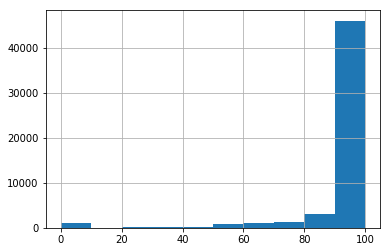

In [26]:
print("Histogram of host response times")
df.host_response_rate.hist();

In [27]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

In [28]:
# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       37730
unknown    25699
50-89%      7346
90-99%      6519
0-49%       2377
Name: host_response_rate, dtype: int64

**host_is_superhost**

There are 248 rows lacking values for each of five different host-related features. These rows will be dropped.

In [29]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


248

In [30]:
df.dropna(subset=['host_since'], inplace=True)

**zipcode**

Postcodes in the UK are complicated and messy. They can be various lengths, and consist of letters and numbers in various orders. The first half of a postcode is called the outcode or postcode district, and refers to areas as shown in the top image below. Just to make things more complicated, the main geographic division of London is into 32 boroughs, which do not align with postcode districts (as seen in the bottom image below).

London postcode districts:
<img src="images/London_outcodes.png" width="500">

London postcode districts (red), layered over London boroughs (black lines):
<img src="images/London_boroughs_and_outcodes.png" width="500">

Postcode districts are on a more granular geographic scale than boroughs. Therefore it is preferable to use them for this analysis, as Airbnb rental price is highly dependent on location. Boroughs will be kept in for EDA purposes but dropped for modeling, and postcodes will be used for the modeling process. The dataset also includes latitude and longitude, which will be kept in for EDA and will be experimented in during the modeling process.

When entered correctly, the postcode district should be separated from the rest of the postcode by a space:

In [31]:
# Splitting the zipcode string at the space, and keeping the first half
df['postcode_area'] = df.zipcode.str.upper().str.split(' ').str[0]

Unfortunately this appears to be a free entry form, as the maximum length of a postcode district is 4:

In [32]:
df.postcode_area.str.len().value_counts()

3.0     36019
2.0     21554
4.0     18780
6.0       476
5.0       330
7.0       318
1.0         7
8.0         3
11.0        2
0.0         1
Name: postcode_area, dtype: int64

In [33]:
# Some examples of postcode districts with length 5, which is not an allowable length
df[df.postcode_area.str.len() == 5][:5]

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_days_active,postcode_area
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51830,none,2010-09-19,within a few hours,100%,f,1.0,t,t,Westminster,W25PB,51.51732,-0.19313,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$120.00,$400.00,$50.00,2,$20.00,2,42,today,t,4,6,6,28,104,9,2011-01-11,2019-01-03,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,t,f,strict_14_with_grace_period,f,f,1.04,3124.0,W25PB
97209,none,2011-04-17,unknown,unknown,f,2.0,t,f,Hackney,E50EN,51.55457,-0.03643,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",$80.00,"$1,000.00",$50.00,2,$20.00,14,730,23 months ago,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,strict_14_with_grace_period,f,f,NaN,2914.0,E50EN
244112,none,2011-10-12,within a day,50-89%,t,1.0,t,f,Islington,N12HG,51.54216,-0.09764,House,Private room,1,2.0,1.0,0.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,Heating}",$50.00,NaN,NaN,1,$50.00,2,365,2 months ago,t,23,53,83,358,125,10,2012-02-11,2019-04-07,94.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,f,moderate,f,f,1.43,2736.0,N12HG
387935,social,2012-03-17,within an hour,100%,f,1.0,t,t,Hackney,E58AJ,51.56047,-0.06469,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$50.00,NaN,NaN,1,$0.00,1,5,3 days ago,t,1,10,40,315,2,0,2012-03-27,2013-10-12,90.0,10.0,8.0,10.0,10.0,10.0,8.0,f,f,f,flexible,f,f,0.02,2579.0,E58AJ
387951,none,2012-03-17,within a day,50-89%,f,4.0,t,f,Islington,N10ju,51.53890,-0.11298,House,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",""Fre...",$85.00,$85.00,$30.00,1,$0.00,1,90,11 months ago,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,strict_14_with_grace_period,f,t,NaN,2579.0,N10JU


Although it would be possible to correct a lot of these postcodes by going through manually and extracting the correct codes, this would be a laborious manual process and is not easily solved by regex or other logical rules (known from personal experience).

Non-central London postcodes (those in the orange area of the first image above) are less common, and can be reduced to the first two letters of their postcode (known as a postcode area).

After this all postcode districts with a length other than 2, 3 and 4 (the only correct lengths), or a null value, or with a small count, will be replaced with 'unknown'.

In [34]:
# Replacing outer London postcode districts with their two-letter postcode areas
df.loc[df.postcode_area.str.startswith(('EN', 'CM','IG', 'RM', 'DA', 'BR', 'CR', 'SM', 'KT', 'TW', 'UB', 'HA', 'WD'), na=False), 'postcode_area'] = df.postcode_area.str[:2]

In [35]:
df.postcode_area[(df.postcode_area.str.len() < 2)] = "unknown" # Replace postal areas with a length less than 2
df.postcode_area[(df.postcode_area.str.len() > 4)] = "unknown" # Replace postal areas with a length more than 4
df.postcode_area.fillna("unknown", inplace=True) # Replace null postal areas
#df.drop(df.loc[df.postcode_area=='unknown'].index, inplace=True) # Dropping unknowns
df.postcode_area.value_counts() # Show value counts

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


unknown    2961
E1         2945
W2         2676
N1         2660
E2         2051
NW1        1942
SE1        1907
E14        1599
TW         1423
SW6        1415
SW11       1364
E8         1340
NW6        1208
W14        1102
N16        1025
HA          973
E3          966
N7          924
W9          923
CR          898
NW10        887
NW3         884
SW18        877
SW1V        870
SW19        857
SW3         856
E5          819
SW5         816
SE16        814
SW7         794
W12         786
N4          785
W11         782
SW2         770
SW8         768
W6          755
E9          732
SW9         726
SE15        634
UB          633
SE5         630
SW10        618
W8          617
NW2         614
E15         606
E16         603
W10         598
SW4         593
SW15        567
W3          559
           ... 
EC2Y         14
WC2A         13
WIJ          11
EC4N         11
TN16         10
EC4Y         10
W1            9
W1C           9
EC1           8
EC3A          7
EC4M          7
EC2N    

In [36]:
# Renaming rows with fewer than 500 listings
value_counts = df.postcode_area.value_counts()
to_rename = value_counts[value_counts < 400].index
df.postcode_area[(df.postcode_area.isin(to_rename))] = "unknown"

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
df.postcode_area.value_counts()

unknown    19905
E1          2945
W2          2676
N1          2660
E2          2051
NW1         1942
SE1         1907
E14         1599
TW          1423
SW6         1415
SW11        1364
E8          1340
NW6         1208
W14         1102
N16         1025
HA           973
E3           966
N7           924
W9           923
CR           898
NW10         887
NW3          884
SW18         877
SW1V         870
SW19         857
SW3          856
E5           819
SW5          816
SE16         814
SW7          794
W12          786
N4           785
W11          782
SW2          770
SW8          768
W6           755
E9           732
SW9          726
SE15         634
UB           633
SE5          630
SW10         618
W8           617
NW2          614
E15          606
E16          603
W10          598
SW4          593
SW15         567
W3           559
E17          556
SE17         550
SE11         544
KT           538
EC1V         537
SW16         531
SW17         503
IG           494
BR           4

Unfortunately the 'unknown' category now swamps other categories. This will be returned to later (e.g. by creating a list of allowable categories, which are more granular in more central London, and less granular outside).

In [38]:
df.drop('zipcode', axis=1, inplace=True)

**bathrooms**

Missing values will be replaced with the median (to avoid strange fractions).

In [39]:
print("Null values:", df.bathrooms.isna().sum())
print("Median value:", df.bathrooms.median())

Null values: 143
Median value: 1.0


In [40]:
df.bathrooms.fillna(df.bathrooms.median(), inplace=True)

**bedrooms**

Missing values will be replaced with the median.

In [41]:
print("Null values:", df.bedrooms.isna().sum())
print("Median value:", df.bedrooms.median())

Null values: 37
Median value: 1.0


In [42]:
df.bedrooms.fillna(df.bedrooms.median(), inplace=True)

**beds**

Missing values will be replaced with the median.

In [43]:
print("Null values:", df.beds.isna().sum())
print("Median value:", df.beds.median())

Null values: 133
Median value: 1.0


In [44]:
df.beds.fillna(df.beds.median(), inplace=True)

**amenities**

Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

In [45]:
# Example of amenities listed
df.amenities[:1].values

array(['{TV,"Cable TV",Wifi,Kitchen,"Paid parking off premises","Smoking allowed","Free street parking","Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Outlet covers",Bathtub,"Children’s books and toys","Babysitter recommendations",Crib,"Pack ’n Play/travel crib","Room-darkening shades","Children’s dinnerware","Hot water","Bed linens","Extra pillows and blankets","Ethernet connection","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Patio or balcony","Luggage dropoff allowed","Long term stays allowed","Step-free access","Wide doorway","Wide clearance to bed","Accessible-height bed","Step-free access","Wide doorway","Bathtub with bath chair","Accessible-height toilet","Host greets you","Handheld shower head","Roll-in shower"}'],
      dtype=object)

In [46]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]

In [47]:
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling hoist',
 'Central air conditioning',
 'Changing table',
 "Chef's kitchen",
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Dining area',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',


In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). Based on previous experience working in the Airbnb property management industry, and research into which amenities are considered by guests to be more important, a selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

The amenities chosen are (slashes indicate separate categories that can be combined):
- 24-hour check-in
- Air conditioning/central air conditioning
- Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
- BBQ grill/fire pit/propane barbeque
- Balcony/patio or balcony
- Bathtub/alfresco bathtub
- Bathroom essentials
- Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
- Bed linens
- Breakfast
- Building staff/doorman
- Cable TV/TV
- Coffee maker/espresso machine
- Cooking basics
- Dining area/formal dining area
- Dishwasher/Dryer/Washer/Washer and dryer
- Elevator
- En suite bathroom
- Exercise equipment/gym/private gym/shared gym
- Family/kid friendly, or anything containing 'children'
- Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
- Garden or backyard/outdoor seating/sun loungers/terrace
- Heated floors
- Host greets you
- Hot tub/jetted tub/private hot tub/sauna/shared hot tub
- Indoor fireplace
- Internet/pocket wifi/wifi
- Long term stays allowed
- Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
- Pool/private pool/shared pool
- Private bathroom
- Private entrance
- Safe/security system
- Self check-in
- Smoking allowed
- Step-free access/wheelchair accessible, or anything containing 'accessible'
- Suitable for events
- Tennis court

In [48]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Bathtub|Alfresco bathtub'), 'bath'] = 1
df.loc[df['amenities'].str.contains('Bathroom essentials'), 'bathroom_essentials'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('Building staff|Doorman'), 'staff'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dining area|Formal dining area'), 'dining_area'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('En suite bathroom'), 'en_suite'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Heated floors'), 'heated_floors'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna'), 'hot_tub_or_sauna'] = 1
df.loc[df['amenities'].str.contains('Indoor fireplace'), 'fireplace'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Pool|pool'), 'pool'] = 1
df.loc[df['amenities'].str.contains('Private bathroom'), 'private_bathroom'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Tennis court'), 'tennis_court'] = 1

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:29: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [49]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,53:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [50]:
df.drop('amenities', axis=1, inplace=True)

**price**

Price will be converted to an integer - currently it is a string because there is a currency sign.

In [51]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

**security_deposit**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

Having a missing value for security deposit is functionally the same as having a security deposit of £0, so missing values will be replaced with 0.

In [52]:
df.security_deposit.isna().sum()

28197

In [53]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

**cleaning_fee**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

As with security deposit, having a missing value for cleaning fee is functionally the same as having a cleaning fee of £0, so missing values will be replaced with 0.

In [54]:
df.cleaning_fee.isna().sum()

20969

In [55]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

**extra_people**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

As with security deposit, having a missing value for extra people is functionally the same as having an extra people fee of £0, so missing values will be replaced with 0.

In [56]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

**first_review and last_review**

About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [57]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 25.4%
Null values in 'review_scores_rating': 27.5%


Convert to timedelta (how many days ago)

If no reviews then...? Keep as unknown category and use as categorical instead of numerical?

**review ratings columns**

As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

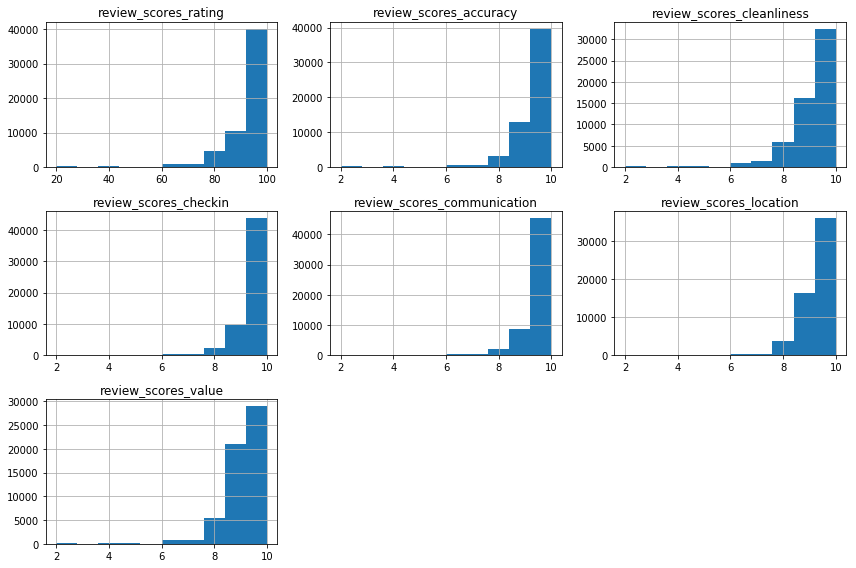

In [58]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [59]:
df.review_scores_accuracy.value_counts()

10.0    39514
9.0     12935
8.0      3270
7.0       665
6.0       634
2.0       254
4.0       149
5.0       104
3.0         8
Name: review_scores_accuracy, dtype: int64

In [60]:
def bin_reviews(col, bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10']):
    """
    Takes in a column name, and optionally bin cut points and labels, replaces
    the original column with a binned version, and replaces nulls with 'unknown'.
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels)
    df[col] = df[col].astype('str')
    df[col].fillna('unknown', inplace=True)

In [61]:
# Example of a binned category
df.review_scores_accuracy.value_counts()

10.0    39514
9.0     12935
8.0      3270
7.0       665
6.0       634
2.0       254
4.0       149
5.0       104
3.0         8
Name: review_scores_accuracy, dtype: int64

In [62]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [69]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_reviews(col, bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'])

In [71]:
# Binning column scored out of 100
bin_reviews('review_scores_rating', bins=[0, 80, 95, 100], labels=['0-79/100', '80-94/100', '95-100/100'])

**reviews_per_month**

For reviews per month, null values will be replaced with 0, as it is correct to say that these listings have had 0 reviews for all of the months that they have been active. Also, the vast majority of listings get 0-1 reviews per month on average, so this is a reasonable number to replace them with.

Reviews per month


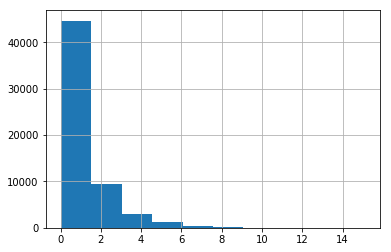

In [65]:
print("Reviews per month")
df.reviews_per_month.hist();

In [73]:
df.isna().sum()

experiences_offered                     0
host_since                              0
host_response_time                      0
host_response_rate                      0
host_is_superhost                       0
host_listings_count                     0
host_has_profile_pic                    0
host_identity_verified                  0
neighbourhood_cleansed                  0
latitude                                0
longitude                               0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
bed_type                                0
price                                   0
security_deposit                        0
cleaning_fee                            0
guests_included                         0
extra_people                            0
minimum_nights                    

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79423 entries, 13913 to 33720044
Data columns (total 89 columns):
experiences_offered                 79423 non-null object
host_since                          79423 non-null datetime64[ns]
host_response_time                  79423 non-null object
host_response_rate                  79423 non-null object
host_is_superhost                   79423 non-null object
host_listings_count                 79423 non-null float64
host_has_profile_pic                79423 non-null object
host_identity_verified              79423 non-null object
neighbourhood_cleansed              79423 non-null object
latitude                            79423 non-null float64
longitude                           79423 non-null float64
property_type                       79423 non-null object
room_type                           79423 non-null object
accommodates                        79423 non-null int64
bathrooms                           79423 non-null float64
bed

***

# Exploratory data analysis

In this section...

### Preparing the data for modeling

Delete additional columns: host_since

***

# Building a neural network

In this section...

- Try with postcode districts, and then with lat/long
- Try with and without occupancy columns?
- Try after deleting categorical columns with predominantly one category (e.g. experiences offered)?
- Try with different standardisation/normalisation technique?
- Try different techniques for listings without reviews/host response times, i.e. those that haven't yet had a booking, e.g. dropping rows or columns entirely

***

# Conclusions and recommendations

Conclusions

**Potential directions for future work**
- Include a wider geographic area, e.g. other major cities around the world are available on Insideairbnb
- Use better quality/more accurate data with actual prices paid per night
- Augment the model with NLP of listing descriptions and/or reviews, e.g. for sentiment analysis or looking for keywords
- Augment the model with a convolutional neural network to attempt to assess the quality of images (images are hugely important on Airbnb)
- In addition to predicting base prices, a sequence model could be used to calculate daily rates using data on seasonality and occupancy